In [1]:
#Load libraries
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import numpy as np
from numpy import genfromtxt
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
import pandas as pd

In [2]:
#Load CSV file
df = pd.read_csv("bank-additional-full.csv", sep=";")
data = df.values
df = df.drop(['duration'], axis=1)
number_of_features = 63
print(number_of_features)
data

63


array([[56, 'housemaid', 'married', ..., 4.857, 5191.0, 'no'],
       [57, 'services', 'married', ..., 4.857, 5191.0, 'no'],
       [37, 'services', 'married', ..., 4.857, 5191.0, 'no'],
       ...,
       [56, 'retired', 'married', ..., 1.028, 4963.6, 'no'],
       [44, 'technician', 'married', ..., 1.028, 4963.6, 'yes'],
       [74, 'retired', 'married', ..., 1.028, 4963.6, 'no']], dtype=object)

# One hot encoding of all categorical values and standardizing

In [3]:
#One-hot encoding of categorical values
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res)

In [4]:
features_to_encode = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
for feature in features_to_encode:
    df = encode_and_bind(df, feature)
df

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_no,y_yes
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,1,0,0,0,0,1,0,1,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,1,0,0,0,0,1,0,1,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,1,0,0,0,0,1,0,1,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,...,0,1,0,0,0,0,1,0,1,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,...,1,0,0,0,0,0,1,0,0,1
41184,46,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,...,1,0,0,0,0,0,1,0,1,0
41185,56,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,...,1,0,0,0,0,0,1,0,1,0
41186,44,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,...,1,0,0,0,0,0,1,0,0,1


In [5]:
x = df.iloc[:,0:63].values #features
y = df.iloc[:,63].values # target
x

array([[ 56.,   1., 999., ...,   1.,   0.,   1.],
       [ 57.,   1., 999., ...,   1.,   0.,   1.],
       [ 37.,   1., 999., ...,   1.,   0.,   1.],
       ...,
       [ 56.,   2., 999., ...,   1.,   0.,   1.],
       [ 44.,   1., 999., ...,   1.,   0.,   0.],
       [ 74.,   3., 999., ...,   0.,   0.,   1.]])

In [6]:
y

array([0, 0, 0, ..., 0, 1, 0], dtype=uint8)

In [7]:
#Create scaler
scaler = preprocessing.StandardScaler()

In [8]:
#Transform the feature
features_standardized = scaler.fit_transform(x)

In [9]:
#Splitting into train and test sets
features_train, features_test, target_train, target_test = train_test_split(features_standardized,y,test_size = 0.5, random_state = 0)

# Network with l2 regulization

In [10]:
# Load libraries
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from keras import regularizers

In [11]:
# Start neural network
network = models.Sequential()
# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation="relu", kernel_regularizer=regularizers.l2(0.01), input_shape=(
number_of_features,)))
# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, kernel_regularizer=regularizers.l2(0.01), activation="relu"))
# Add fully connected layer with a sigmoid activation function
network.add(layers.Dense(units=1, activation="sigmoid"))
# Compile neural network
network.compile(loss="binary_crossentropy", # Cross-entropy
optimizer="rmsprop", # Root Mean Square Propagation
metrics=["accuracy"]) # Accuracy performance metric

In [12]:
# Train neural network
history = network.fit(features_train, # Features
target_train, # Target vector
epochs=10, # Number of epochs
verbose=1, # Print description after each epoch
batch_size=1000, # Number of observations per batch
validation_data=(features_test, target_test)) # Test data

Epoch 1/10
21/21 [==============================] - 3s 21ms/step - loss: 0.8356 - accuracy: 0.8512 - val_loss: 0.7449 - val_accuracy: 0.8853
Epoch 2/10
21/21 [==============================] - 0s 5ms/step - loss: 0.6880 - accuracy: 0.8861 - val_loss: 0.6328 - val_accuracy: 0.8891
Epoch 3/10
21/21 [==============================] - 0s 5ms/step - loss: 0.5871 - accuracy: 0.8907 - val_loss: 0.5422 - val_accuracy: 0.8985
Epoch 4/10
21/21 [==============================] - 0s 5ms/step - loss: 0.5023 - accuracy: 0.9040 - val_loss: 0.4627 - val_accuracy: 0.9137
Epoch 5/10
21/21 [==============================] - 0s 6ms/step - loss: 0.4265 - accuracy: 0.9206 - val_loss: 0.3905 - val_accuracy: 0.9284
Epoch 6/10
21/21 [==============================] - 0s 6ms/step - loss: 0.3579 - accuracy: 0.9379 - val_loss: 0.3262 - val_accuracy: 0.9475
Epoch 7/10
21/21 [==============================] - 0s 5ms/step - loss: 0.2969 - accuracy: 0.9571 - val_loss: 0.2691 - val_accuracy: 0.9695
Epoch 8/10
21/21 [=

In [13]:
# Predict classes of test set
predicted_target = network.predict(features_test)
predicted_target

array([[0.71141976],
       [0.01499358],
       [0.01900172],
       ...,
       [0.01638535],
       [0.74875176],
       [0.01795194]], dtype=float32)

In [14]:
# View the probability the first observation is class 1
predicted_target[1]

array([0.01499358], dtype=float32)

# Visualise loss and accuracy

In [15]:
# Get training and test loss histories
training_loss = history.history["loss"]
test_loss = history.history["val_loss"]
# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

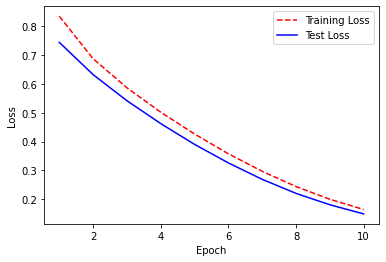

In [16]:
import matplotlib.pyplot as plt
# Visualize loss history
plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, test_loss, "b-")
plt.legend(["Training Loss", "Test Loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [17]:
training_accuracy = history.history["accuracy"]
test_accuracy = history.history["val_accuracy"]

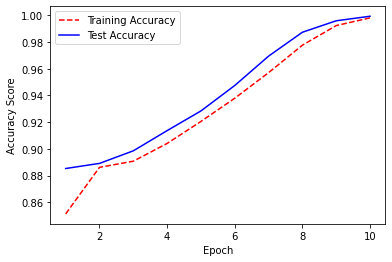

In [18]:
plt.plot(epoch_count, training_accuracy, "r--")
plt.plot(epoch_count, test_accuracy, "b-")
# Visualize accuracy history
plt.legend(["Training Accuracy", "Test Accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy Score")
plt.show()

# Visualize netwok architecture

In [19]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils.vis_utils import plot_model

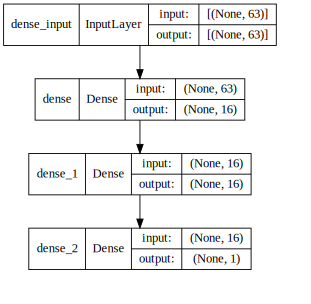

In [20]:
# Visualize network architecture
SVG(model_to_dot(network, show_shapes=True, dpi=65).create(prog="dot", format="svg"))